# CS105 - Winter 2020 - Mini Project 1
## Historical data on avocado prices and sales volumes in multiple US markets
### Francisco Lagos Vilaboa
### ID: 862018654
### 01/26/2020

The dataset used in this project was obtained from the kaggle website (https://www.kaggle.com/neuromusic/avocado-prices) which got the data shared from the Hass Avocado Board.

The dataset shows a weekly 2018 retail scan data for National reatil volume and price.The data has been collected since 2013, and it was downloaded in 2018. The data shows average price of avocados per unit cost. The Product Lookuo Codes columns (PLU'S) in the table are only for Hass Avocados use therefore they wont be used in this project.

The dataset is tabular since it is whown in columns and row. The columns used for this project are as follow:
1. Date
2. AveragePrice
3. Total Volume
4. Total Bags
5. Small Bags
6. Large Bags
7. Xlarge Bags
8. Type (conventional or organic)
9. year
10. region


Now lets import all the libraries to be used:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

Lets load the data set to pandas, drop the unused columns, and display the head of the dataframe.

In [2]:
df = pd.read_csv("/home/csmajs/flago001/lagosvilaboa_francisco_miniproject1/avocado.csv")
df = df.drop(columns=['Unnamed: 0', '4046', '4225', '4770'])
df.head()

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Lets now look at the information of the data and the data type of each of the columns.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(6), int64(1), object(3)
memory usage: 1.4+ MB


Now that we have look at the data information. We are going to describe some statistical summary of the AveragePrices this include min, max, mean, mode, median, and standard deviaton.

**AveragePrice**

The maximum AveragePrice is: 3.25
The mininimum AveragePrice is: 0.44
The mean value for the AveragePrices is: 1.405978409775878
The mode of the Average Price is 1.15
The median for the Average Price is 1.37
The standard deviation number of the Average Price is: 0.40267655549555065


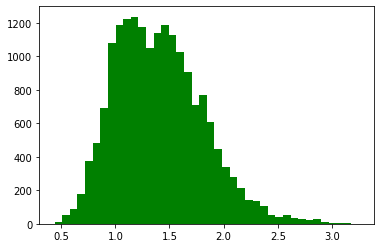

In [4]:
maximumNum = df['AveragePrice'].max()
print("The maximum AveragePrice is:", maximumNum)

minimumNum = df['AveragePrice'].min()
print("The mininimum AveragePrice is:", minimumNum)

mean = df["AveragePrice"].mean()
print("The mean value for the AveragePrices is:", mean)

mode = statistics.mode(df['AveragePrice'])
print("The mode of the Average Price is", mode)

median = statistics.median(df['AveragePrice'])
print("The median for the Average Price is", median)

std = df["AveragePrice"].std()
print("The standard deviation number of the Average Price is:", std)

n, bins, patches = plt.hist(df['AveragePrice'], 40, facecolor='green')
plt.show()


With this stadistics of the average price we see that between 2013 and 2018, the maximum average price of the avocado in different areas of the united states was 3.25, and a minimum of .44 dollars, with an average AveragePrice of 1.40 dollars.
The standard deviation shows .4026 which is not much, so the average prices avocado does not change too drastically. So the data is dense and not sparse

Another thing that we can see from this data is the relation between the total amount of bags sold, and the volume (total number of avocados sold), to visualize this we can use a scatter plot like the one in the matrix below:

The average price of convencional avocados is: 1.1580396668858208
The average price of organic avocados is: 1.6539986846432095


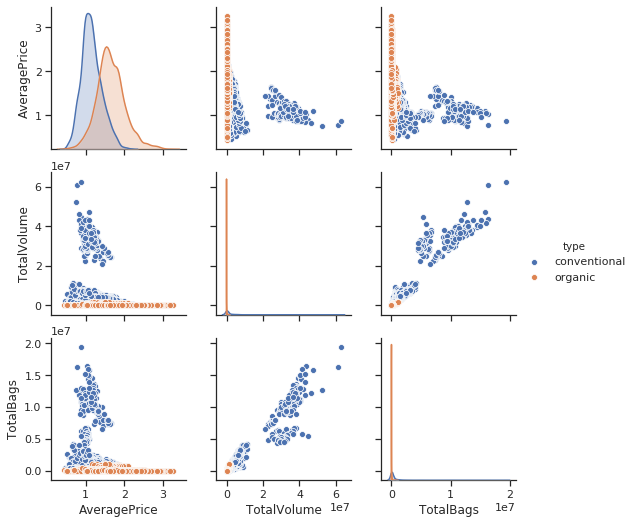

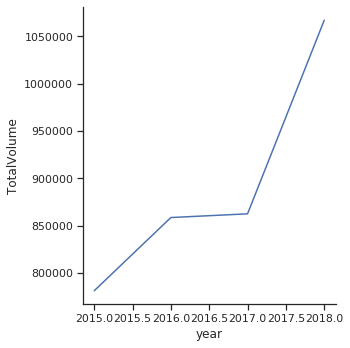

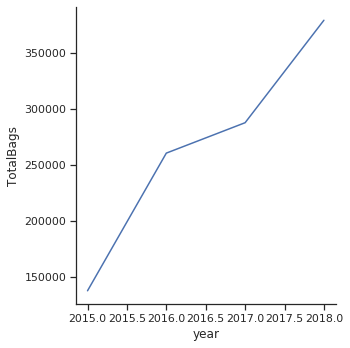

In [5]:
df = df.rename(columns={"Total Volume": "TotalVolume"})
df = df.rename(columns={"Total Bags": "TotalBags"})
df = df.rename(columns={"Large Bags": "LargeBags"})
df = df.rename(columns={"Small Bags": "SmallBags"})
df = df.rename(columns={"XLarge Bags": "XLargeBags"})
df.head()
tempDf = df.drop(columns=['Date', 'SmallBags', 'LargeBags', 'XLargeBags','region', 'year'])
tempDf.head()

tempDfOrganic = tempDf.query("type == 'organic'")
meanO = tempDfOrganic['AveragePrice'].mean()
tempDfConventional = tempDf.query("type == 'conventional'")
meanC = tempDfConventional['AveragePrice'].mean()
print("The average price of convencional avocados is:",meanC)
print("The average price of organic avocados is:",meanO)

sns.set(style="ticks", color_codes =True)
sns.pairplot(tempDf, hue="type")

sns.relplot(x="year", y="TotalVolume", ci=None, kind="line", data=df);
sns.relplot(x="year", y="TotalBags", ci=None, kind="line", data=df);

In this scatterplot and graphs we can observe how TotalVolume, and TotalBags have good correlation which means that one of these is redundant. We can also see in the line graphs how both have been increasing fast with time, and have really similar graphs. And also thei relation with average price looks very similar. It is easy to see how organic avocados are not being sold as much as conventional ones, we can see this in the difference of colors, orange being organic avocados always around 0-1.5 total bags sold and small totall volume. This makes sense because we can see that the average of average prices for organic avocados is higher than conventional avocados

In [6]:
columns = ['SmallBags', 'LargeBags', 'XLargeBags']
tempDf = df.replace(0, pd.np.nan).dropna(axis=0, how='any', subset=columns).fillna(0)
tempDf = tempDf.drop(columns=['Date', 'type', 'region', 'year'])

meanSB = tempDf["SmallBags"].mean()
meanLB = tempDf["LargeBags"].mean()
meanXLB = tempDf["XLargeBags"].mean()
meanTB = tempDf["TotalBags"].mean()
meanTV = tempDf["TotalVolume"].mean()
meanAP = tempDf["AveragePrice"].mean()
# print('small bags: ', meanSB)
# print('large bags: ',meanLB)
# print('extra large bags: ',meanXLB)
# print('total bags: ', meanTB)
# print('total volume: ',meanTV) #different than the total volume calculated above because columns where there was any 0 on any of the bags were dropped
print('mean average price: ', meanAP, '\n') #same as above

percentSB = (meanSB/meanTB) * 100
print(percentSB, '% of the bags are small bags')
percentLB = (meanLB/meanTB) * 100
print(percentLB, '% of the bags large bags')
percentXLB = (meanXLB/meanTB) * 100
print(percentXLB, '% of the bags are extra large bags\n')

volumeSB = (percentSB*meanTV)/100
print('the volume of avocados sold by small bags is:',volumeSB)
volumeLB = (percentLB*meanTV)/100
print('the volume of avocados sold by large bags is:',volumeLB)
volumeXLB = (percentXLB*meanTV)/100
print('the volume of avocados sold by extra large bags is:',volumeXLB, '\n')

mean average price:  1.1751543513957308 

76.68133938848267 % of the bags are small bags
21.844135912198244 % of the bags large bags
1.4745244908698134 % of the bags are extra large bags

the volume of avocados sold by small bags is: 1730250.3755888685
the volume of avocados sold by large bags is: 492894.68165148055
the volume of avocados sold by extra large bags is: 33271.413547135795 



The data obtained aboved is usefuel see how people tends to buy avocados, in this case small bags are the highest sold out of the bags, followed by large and then extra large.With this information we can assume that most of the avocados that are sold, have been bought buy people and not buy bigger companies or restaurants that have the need to buy in bigger quantities.

In [11]:
grouped = df.groupby('region')
dfList = []
# i=0
for name in grouped:
    dfList.append(name)
#     print(dfList[i][0])
#     i+=1

    
# averagePerCity = pd.DataFrame.from_dict(dict(dfList))
# averagePerCity.head(40)

j=0

df[df['region'] == dfList[j][0]].head()

,Date,AveragePrice,TotalVolume,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
